In [107]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [108]:
df= pd.read_excel(r"C:\\Users\\lesson\\OneDrive\\Desktop\\ALL ML PROJECTS\\kenya_fraud_detection.xlsx")
df.head(10)

,Unnamed: 0,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime
0,0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,night,0,0,0,2024-06-16 21:45:00
1,1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,night,0,0,0,2024-06-05 00:49:00
2,2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,afternoon,0,0,1,2024-06-13 15:54:00
3,3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,night,0,0,1,2024-06-10 01:05:00
4,4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,0,0,2024-06-27 02:28:00
5,5,TX100005,user_7265,Withdraw Cash,1791.94,Meru,Feature Phone,Telkom Kenya,individual,night,0,0,1,2024-06-24 10:34:00
6,6,TX100006,user_1466,Lipa na M-Pesa,522.84,Meru,Feature Phone,Telkom Kenya,individual,evening,0,0,1,2024-06-04 12:33:00
7,7,TX100007,user_5426,Buy Airtime,428.61,Nyeri,iOS,Safaricom,individual,night,0,0,0,2024-06-07 00:58:00
8,8,TX100008,user_6578,Withdraw Cash,1248.08,Nyeri,iOS,Safaricom,individual,afternoon,0,0,0,2024-06-07 11:06:00
9,9,TX100009,user_9322,Lipa na M-Pesa,18797.20,Meru,Feature Phone,Telkom Kenya,individual,evening,0,0,0,2024-06-24 11:53:00


In [109]:
df["user_id"].nunique()

5999

In [110]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime
0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,night,0,0,0,2024-06-16 21:45:00
1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,night,0,0,0,2024-06-05 00:49:00
2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,afternoon,0,0,1,2024-06-13 15:54:00
3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,night,0,0,1,2024-06-10 01:05:00
4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,0,0,2024-06-27 02:28:00


In [111]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           10000 non-null  object        
 1   user_id                  9991 non-null   object        
 2   transaction_type         9994 non-null   object        
 3   amount                   9989 non-null   float64       
 4   location                 9973 non-null   object        
 5   device_type              9975 non-null   object        
 6   network_provider         9996 non-null   object        
 7   user_type                9997 non-null   object        
 8   time_of_day              9995 non-null   object        
 9   is_foreign_number        10000 non-null  int64         
 10  is_sim_recently_swapped  10000 non-null  int64         
 11  has_multiple_accounts    10000 non-null  int64         
 12  datetime                 10000 no

In [112]:
df.isna().sum()

transaction_id              0
user_id                     9
transaction_type            6
amount                     11
location                   27
device_type                25
network_provider            4
user_type                   3
time_of_day                 5
is_foreign_number           0
is_sim_recently_swapped     0
has_multiple_accounts       0
datetime                    0
dtype: int64

In [113]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9933 entries, 0 to 9932
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           9933 non-null   object        
 1   user_id                  9933 non-null   object        
 2   transaction_type         9933 non-null   object        
 3   amount                   9933 non-null   float64       
 4   location                 9933 non-null   object        
 5   device_type              9933 non-null   object        
 6   network_provider         9933 non-null   object        
 7   user_type                9933 non-null   object        
 8   time_of_day              9933 non-null   object        
 9   is_foreign_number        9933 non-null   int64         
 10  is_sim_recently_swapped  9933 non-null   int64         
 11  has_multiple_accounts    9933 non-null   int64         
 12  datetime                 9933 non-

In [114]:
df.dtypes

transaction_id                     object
user_id                            object
transaction_type                   object
amount                            float64
location                           object
device_type                        object
network_provider                   object
user_type                          object
time_of_day                        object
is_foreign_number                   int64
is_sim_recently_swapped             int64
has_multiple_accounts               int64
datetime                   datetime64[ns]
dtype: object

In [121]:
df["hour"]= df["datetime"].dt.hour
df["dayofweek"]= df["datetime"].dt.dayofweek
df["month"]= df["datetime"].dt.month
df["is_weekend"]= df["dayofweek"].apply(lambda x: 1 if x>=5 else 0)
df.head()


,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime,hour,dayofweek,month,is_weekend
0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,night,0,0,0,2024-06-16 21:45:00,21,6,6,1
1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,night,0,0,0,2024-06-05 00:49:00,0,2,6,0
2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,afternoon,0,0,1,2024-06-13 15:54:00,15,3,6,0
3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,night,0,0,1,2024-06-10 01:05:00,1,0,6,0
4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,0,0,2024-06-27 02:28:00,2,3,6,0


In [122]:
df['channel'] = df.apply(
    lambda x: 'Agent' if x['user_type']=='agent'
              else 'App' if x['device_type'] in ['Android','iOS']
              else 'USSD',
    axis=1
)
df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime,hour,dayofweek,month,is_weekend,channel
0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,night,0,0,0,2024-06-16 21:45:00,21,6,6,1,USSD
1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,night,0,0,0,2024-06-05 00:49:00,0,2,6,0,Agent
2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,afternoon,0,0,1,2024-06-13 15:54:00,15,3,6,0,Agent
3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,night,0,0,1,2024-06-10 01:05:00,1,0,6,0,App
4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,0,0,2024-06-27 02:28:00,2,3,6,0,USSD


In [124]:
df = df.sort_values(['user_id','datetime']).reset_index(drop=True)
df['net'] = df['amount'].where(df['transaction_type']=='Deposit Cash')
df['balance_before'] = df.groupby('user_id')['net'].cumsum().shift().fillna(0)
df['balance_after'] = df['balance_before'] + df['net']


In [ ]:
df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime,hour,dayofweek,month,channel,net,balance_before,balance_after
0,TX105281,user_1001,Withdraw Cash,1712.81,Nakuru,Android,Telkom Kenya,individual,afternoon,0,0,0,2024-06-08 16:42:00,16,5,6,App,-1712.81,0.00,-1712.81
1,TX101539,user_1001,Lipa na M-Pesa,737.01,Nairobi,Android,Safaricom,individual,night,0,0,1,2024-06-28 18:53:00,18,4,6,App,-737.01,-1712.81,-2449.82
2,TX101454,user_1001,Lipa na M-Pesa,4526.93,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,0,0,2024-06-29 05:35:00,5,5,6,USSD,-4526.93,-2449.82,-6976.75
3,TX107577,user_1002,Pay Bill,6412.03,Eldoret,Feature Phone,Airtel,individual,night,0,0,0,2024-06-07 20:01:00,20,4,6,USSD,-6412.03,-6976.75,-13388.78
4,TX103621,user_1002,Buy Airtime,3404.56,Nakuru,iOS,Telkom Kenya,individual,evening,0,0,0,2024-06-09 04:35:00,4,6,6,App,-3404.56,-6412.03,-9816.59


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9933 entries, 0 to 9932
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           9933 non-null   object        
 1   user_id                  9933 non-null   object        
 2   transaction_type         9933 non-null   object        
 3   amount                   9933 non-null   float64       
 4   location                 9933 non-null   object        
 5   device_type              9933 non-null   object        
 6   network_provider         9933 non-null   object        
 7   user_type                9933 non-null   object        
 8   time_of_day              9933 non-null   object        
 9   is_foreign_number        9933 non-null   int64         
 10  is_sim_recently_swapped  9933 non-null   int64         
 11  has_multiple_accounts    9933 non-null   int64         
 12  datetime                 9933 non-

In [126]:
df['is_mobile_verified'] = (
    (df['is_foreign_number'] == 0) &
    (df['is_sim_recently_swapped'] == 0)
).astype(int)


In [130]:
df['current_balance'] = (
    df[df['transaction_type'] == 'Deposit Cash']
      .groupby('user_id')['amount']
      .transform('sum').fillna(0) 
).fillna(0)


In [131]:
df['user_txn_count'] = df.groupby('user_id')['transaction_id'].transform('count')
df['user_total_amount'] = df.groupby('user_id')['amount'].transform('sum')
df['user_avg_amount'] = df['user_total_amount'] / df['user_txn_count']

In [136]:
df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,...,is_weekend,channel,net,balance_before,balance_after,is_mobile_verified,current_balance,user_txn_count,user_total_amount,user_avg_amount
0,TX105281,user_1001,Withdraw Cash,1712.81,Nakuru,Android,Telkom Kenya,individual,afternoon,0,...,1,App,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333
1,TX101539,user_1001,Lipa na M-Pesa,737.01,Nairobi,Android,Safaricom,individual,night,0,...,0,App,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333
2,TX101454,user_1001,Lipa na M-Pesa,4526.93,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,...,1,USSD,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333
3,TX107577,user_1002,Pay Bill,6412.03,Eldoret,Feature Phone,Airtel,individual,night,0,...,0,USSD,NaN,0.0,NaN,1,NaN,2,9816.59,4908.295000
4,TX103621,user_1002,Buy Airtime,3404.56,Nakuru,iOS,Telkom Kenya,individual,evening,0,...,1,App,NaN,0.0,NaN,1,NaN,2,9816.59,4908.295000


In [ ]:
df.to_csv("fraud_detection_processed.csv", index=False) 

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
 'transaction_type','location','device_type',
 'network_provider','user_type','time_of_day','channel'
]

for c in cat_cols:
    df[c] = LabelEncoder().fit_transform(df[c].astype(str))


In [ ]:
FEATURES = [
 'amount','user_txn_count','user_total_amount','user_avg_amount',
 'hour','dayofweek','is_weekend',
 'is_foreign_number','is_sim_recently_swapped','has_multiple_accounts',
 'is_mobile_verified'
] + cat_cols


In [ ]:
X = df[FEATURES].copy()

display(X.head())
display(X.info())

,amount,user_txn_count,user_total_amount,user_avg_amount,hour,dayofweek,is_weekend,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,is_mobile_verified,transaction_type,location,device_type,network_provider,user_type,time_of_day,channel
0,1712.81,3,6976.75,2325.583333,16,5,1,0,0,0,1,5,7,0,2,1,0,0
1,737.01,3,6976.75,2325.583333,18,4,0,0,0,1,1,2,6,0,1,1,3,0
2,4526.93,3,6976.75,2325.583333,5,5,1,0,0,0,1,2,3,1,2,1,2,0
3,6412.03,2,9816.59,4908.295000,20,4,0,0,0,0,1,3,0,1,0,1,3,0
4,3404.56,2,9816.59,4908.295000,4,6,1,0,0,0,1,0,7,2,2,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9933 entries, 0 to 9932
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amount                   9933 non-null   float64
 1   user_txn_count           9933 non-null   int64  
 2   user_total_amount        9933 non-null   float64
 3   user_avg_amount          9933 non-null   float64
 4   hour                     9933 non-null   int32  
 5   dayofweek                9933 non-null   int32  
 6   is_weekend               9933 non-null   int64  
 7   is_foreign_number        9933 non-null   int64  
 8   is_sim_recently_swapped  9933 non-null   int64  
 9   has_multiple_accounts    9933 non-null   int64  
 10  is_mobile_verified       9933 non-null   int32  
 11  transaction_type         9933 non-null   int32  
 12  location                 9933 non-null   int32  
 13  device_type              9933 non-null   int32  
 14  network_provider        

None

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures scaled successfully.")


Features scaled successfully.


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'contamination': [0.005, 0.01, 0.02],
    'max_samples': ['auto', 0.6, 0.8],
    'max_features': [0.6, 0.8, 1.0]
}


In [ ]:
results = []

for n in param_grid['n_estimators']:
    for c in param_grid['contamination']:
        for s in param_grid['max_samples']:
            for f in param_grid['max_features']:

                iso = IsolationForest(
                    n_estimators=n,
                    contamination=c,
                    max_samples=s,
                    max_features=f,
                    random_state=42,
                    n_jobs=-1
                )

                iso.fit(X_scaled)

                scores = -iso.decision_function(X_scaled)
                labels = iso.predict(X_scaled)

                results.append({
                    'n_estimators': n,
                    'contamination': c,
                    'max_samples': s,
                    'max_features': f,
                    'mean_score': scores.mean(),
                    'std_score': scores.std(),
                    'min_score': scores.min(),
                    'max_score': scores.max(),
                    'anomaly_count': np.sum(labels == -1)
                })


In [ ]:
tuning_results = pd.DataFrame(results)
tuning_results.sort_values(
    by=['std_score','max_score'],
    ascending=[False, False]
).head(10)


,n_estimators,contamination,max_samples,max_features,mean_score,std_score,min_score,max_score,anomaly_count
47,200,0.020,auto,1.0,-0.120804,0.048326,-0.208210,0.083179,199
38,200,0.010,auto,1.0,-0.132431,0.048326,-0.219837,0.071552,100
29,200,0.005,auto,1.0,-0.142759,0.048326,-0.230165,0.061224,50
73,300,0.020,auto,0.8,-0.121317,0.048064,-0.206470,0.091508,199
64,300,0.010,auto,0.8,-0.133160,0.048064,-0.218313,0.079665,100
55,300,0.005,auto,0.8,-0.143849,0.048064,-0.229001,0.068976,50
46,200,0.020,auto,0.8,-0.120674,0.047911,-0.205649,0.100440,199
37,200,0.010,auto,0.8,-0.132970,0.047911,-0.217946,0.088144,100
28,200,0.005,auto,0.8,-0.142565,0.047911,-0.227540,0.078550,50
20,100,0.020,auto,1.0,-0.117861,0.047621,-0.204491,0.081315,199


In [ ]:
best_params = tuning_results.sort_values(
    by=['std_score','max_score'],
    ascending=[False, False]
).iloc[0]

best_params


n_estimators          200
contamination        0.02
max_samples          auto
max_features          1.0
mean_score      -0.120804
std_score        0.048326
min_score        -0.20821
max_score        0.083179
anomaly_count         199
Name: 47, dtype: object

In [ ]:
iso_final = IsolationForest(
    n_estimators=int(best_params['n_estimators']),
    contamination=best_params['contamination'],
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    random_state=42,
    n_jobs=-1
)

iso_final.fit(X_scaled)


IsolationForest(contamination=0.02, n_estimators=200, n_jobs=-1,
                random_state=42)

In [ ]:
top_configs = tuning_results.sort_values(
    by=['std_score', 'max_score'],
    ascending=[False, False]
).head(3)


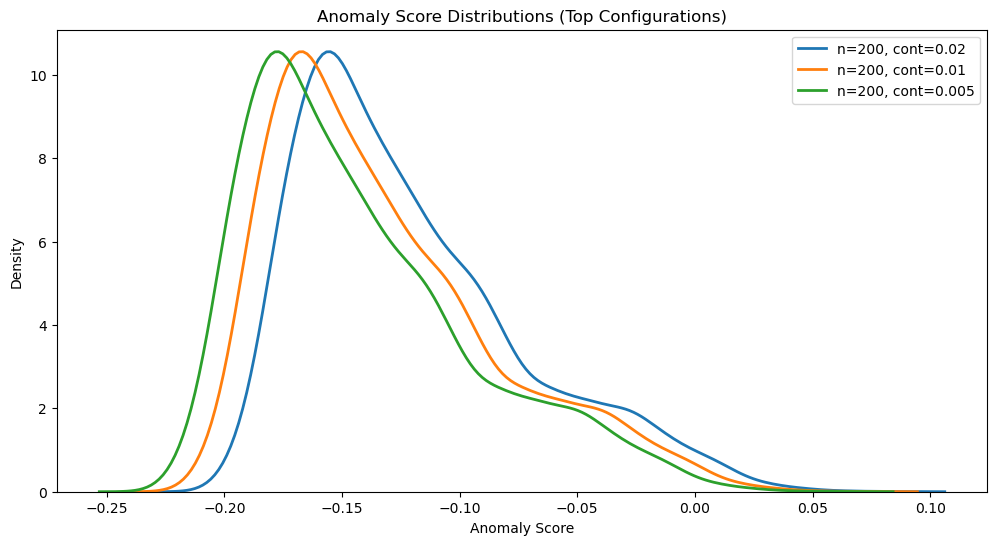

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

for idx, row in top_configs.iterrows():

    iso = IsolationForest(
        n_estimators=int(row['n_estimators']),
        contamination=row['contamination'],
        max_samples=row['max_samples'],
        max_features=row['max_features'],
        random_state=42,
        n_jobs=-1
    )

    iso.fit(X_scaled)
    scores = -iso.decision_function(X_scaled)

    sns.kdeplot(
        scores,
        label=f"n={row['n_estimators']}, cont={row['contamination']}",
        linewidth=2
    )

plt.title("Anomaly Score Distributions (Top Configurations)")
plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.legend()
plt.show()


In [151]:
FINAL_PARAMS = {
    'n_estimators': 200,
    'contamination': 0.02,
    'max_samples': 'auto',
    'max_features': 1.0,
    'random_state': 42,
    'n_jobs': -1
}


In [152]:
iso_final = IsolationForest(**FINAL_PARAMS)
iso_final.fit(X_scaled)


IsolationForest(contamination=0.02, n_estimators=200, n_jobs=-1,
                random_state=42)

In [153]:
df['anomaly_score'] = -iso_final.decision_function(X_scaled)
df['is_anomalous'] = (iso_final.predict(X_scaled) == -1).astype(int)


In [154]:
import joblib

joblib.dump(
    {
        'model': iso_final,
        'scaler': scaler,
        'features': FEATURES,
        'params': FINAL_PARAMS
    },
    'isolation_forest_fraud_model.joblib'
)


['isolation_forest_fraud_model.joblib']

In [155]:
df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,time_of_day,is_foreign_number,...,net,balance_before,balance_after,is_mobile_verified,current_balance,user_txn_count,user_total_amount,user_avg_amount,anomaly_score,is_anomalous
0,TX105281,user_1001,Withdraw Cash,1712.81,Nakuru,Android,Telkom Kenya,individual,afternoon,0,...,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333,-0.134118,0
1,TX101539,user_1001,Lipa na M-Pesa,737.01,Nairobi,Android,Safaricom,individual,night,0,...,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333,-0.107104,0
2,TX101454,user_1001,Lipa na M-Pesa,4526.93,Machakos,Feature Phone,Telkom Kenya,individual,morning,0,...,NaN,0.0,NaN,1,NaN,3,6976.75,2325.583333,-0.157929,0
3,TX107577,user_1002,Pay Bill,6412.03,Eldoret,Feature Phone,Airtel,individual,night,0,...,NaN,0.0,NaN,1,NaN,2,9816.59,4908.295000,-0.151019,0
4,TX103621,user_1002,Buy Airtime,3404.56,Nakuru,iOS,Telkom Kenya,individual,evening,0,...,NaN,0.0,NaN,1,NaN,2,9816.59,4908.295000,-0.125205,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9933 entries, 0 to 9932
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           9933 non-null   object        
 1   user_id                  9933 non-null   object        
 2   transaction_type         9933 non-null   object        
 3   amount                   9933 non-null   float64       
 4   location                 9933 non-null   object        
 5   device_type              9933 non-null   object        
 6   network_provider         9933 non-null   object        
 7   user_type                9933 non-null   object        
 8   time_of_day              9933 non-null   object        
 9   is_foreign_number        9933 non-null   int64         
 10  is_sim_recently_swapped  9933 non-null   int64         
 11  has_multiple_accounts    9933 non-null   int64         
 12  datetime                 9933 non-

In [156]:
df["is_anomalous"].value_counts()

is_anomalous
0    9734
1     199
Name: count, dtype: int64

In [157]:
df.to_csv("fraud_detection_with_anomalies.csv", index=False)